Amplitude: 0.0
Current Mean (I-Mon): 0.001 A
Voltage Mean (V-Mon): -0.002 V
Current Standard Deviation (I-Mon): 0.001 A
Voltage Standard Deviation (V-Mon): 0.012 V
Amplitude: 1.0
Current Mean (I-Mon): -0.004 A
Voltage Mean (V-Mon): -0.001 V
Current Standard Deviation (I-Mon): 0.004 A
Voltage Standard Deviation (V-Mon): 0.014 V
Amplitude: 2.0
Current Mean (I-Mon): -0.008 A
Voltage Mean (V-Mon): 0.003 V
Current Standard Deviation (I-Mon): 0.008 A
Voltage Standard Deviation (V-Mon): 0.016 V
Amplitude: 3.0
Current Mean (I-Mon): -0.013 A
Voltage Mean (V-Mon): 0.009 V
Current Standard Deviation (I-Mon): 0.013 A
Voltage Standard Deviation (V-Mon): 0.017 V


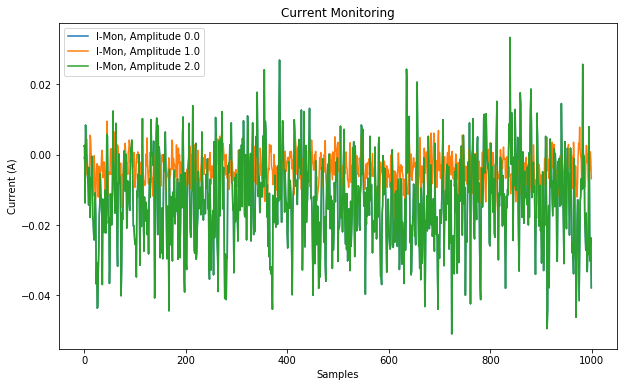

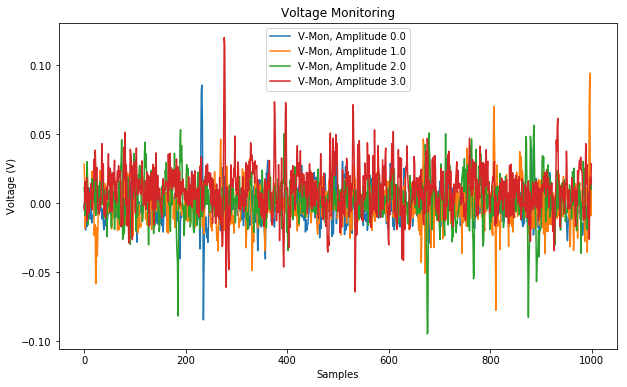

In [10]:
# -*- coding: utf-8 -*-    JJA17 at 4K
"""
Created on Wed 10 Jan 2024 14:41:52 
@author: AJ
Topic: Experimental noise measurment with external white gaussian noise Rigol-DG1022
"""
#%matplotlib notebook 
import numpy as np
import nidaqmx
import time
import pyvisa as visa
import matplotlib.pyplot as plt
import pandas as pd

# FIRST PART: MODULATE AMPLITUDE
rm = visa.ResourceManager()
gen = rm.open_resource(r'USB0::0x1AB1::0x0642::DG1ZA241701602::INSTR')  # Rigol DG1022 noise generator
gen.write('*RST')  # Reset the generator
gen.write('OUTPut1:STATe On')  # Turning on the output of Channel 1
#gen.write('OUTPut2:STATe On')  # Turning on the output of Channel 2

df = pd.DataFrame()      # DATA FRAME FOR CurrentMonitor as current_data
df1 = pd.DataFrame()     # DATA FRAME FOR VoltageMonitor as voltage_data
voltage_mean = []

# SECOND PART: READ the VOLTAGE
with nidaqmx.Task() as send_current, nidaqmx.Task() as send_voltage:
    send_current.ai_channels.add_ai_voltage_chan("Dev4/ai7")  # Set the channel to read I-Mon from NationalInstrument
    send_current.timing.cfg_samp_clk_timing(rate=100000)  # Set the sampling rate

    send_voltage.ai_channels.add_ai_voltage_chan("Dev4/ai5")  # Add another channel to read the V-Mon
    send_voltage.timing.cfg_samp_clk_timing(rate=100000)  # Set the sampling rate
    
    # Read the voltage and apply noise
    amplitude_range = np.linspace(0, 3, 4)
    for i in amplitude_range:
        amplitude = i  # Change the amplitude of the noise signal
        gen.write(f'SOUR1:APPL:NOIS {amplitude}')  # Apply noise with the specified amplitude
        time.sleep(1)  # Wait for the noise to settle

        current_data = send_current.read(number_of_samples_per_channel=20000)
        voltage_data = send_voltage.read(number_of_samples_per_channel=20000)

        # Assuming you want to separate the data into different columns in the DataFrame
        df[f'{amplitude}V'] = current_data
        df1[f'{amplitude}V'] = voltage_data

        current_std = np.std(current_data)
        voltage_std = np.std(voltage_data)

        print(f'Amplitude: {amplitude}')
        print(f'Current Mean (I-Mon): {np.mean(current_data):.3f} A')
        print(f'Voltage Mean (V-Mon): {np.mean(voltage_data):.3f} V')
        print(f'Current Standard Deviation (I-Mon): {current_std:.3f} A')
        print(f'Voltage Standard Deviation (V-Mon): {voltage_std:.3f} V')

# The rest of your code for closing the generator and plotting the data
gen.write('OUTPut1:STATe Off')
#gen.write('OUTPut2:STATe Off')  # Turn off the generator
gen.close()

# Plot data from both channels in separate figures
plt.figure(figsize=(10, 6))  # Figure for Current plots
for i in amplitude_range:
    current_column_index = int((2*i-1))

    if current_column_index < df.shape[1]:
        plt.plot(df.iloc[:, current_column_index], label=f'I-Mon, Amplitude {i}')

plt.legend()
plt.xlabel('Samples')
plt.ylabel('Current (A)')
plt.title('Current Monitoring')
plt.show()

plt.figure(figsize=(10, 6))  # Figure for Voltage plots
for i in amplitude_range:
    voltage_column_index = int((i))

    if voltage_column_index < df1.shape[1]:
        plt.plot(df1.iloc[:, voltage_column_index], label=f'V-Mon, Amplitude {i}')

plt.legend()
plt.xlabel('Samples')
plt.ylabel('Voltage (V)')
plt.title('Voltage Monitoring')
plt.show()

Amplitude: 0.0
Current Mean (I-Mon): 0.001 A
Voltage Mean (V-Mon): 0.343 V
Current Standard Deviation (I-Mon): 0.001 A
Voltage Standard Deviation (V-Mon): 0.005 V
Amplitude: 1.0
Current Mean (I-Mon): -0.005 A
Voltage Mean (V-Mon): 1.431 V
Current Standard Deviation (I-Mon): 0.004 A
Voltage Standard Deviation (V-Mon): 0.005 V
Amplitude: 2.0
Current Mean (I-Mon): -0.009 A
Voltage Mean (V-Mon): 2.046 V
Current Standard Deviation (I-Mon): 0.008 A
Voltage Standard Deviation (V-Mon): 0.006 V
Amplitude: 3.0
Current Mean (I-Mon): -0.013 A
Voltage Mean (V-Mon): 3.208 V
Current Standard Deviation (I-Mon): 0.013 A
Voltage Standard Deviation (V-Mon): 0.007 V


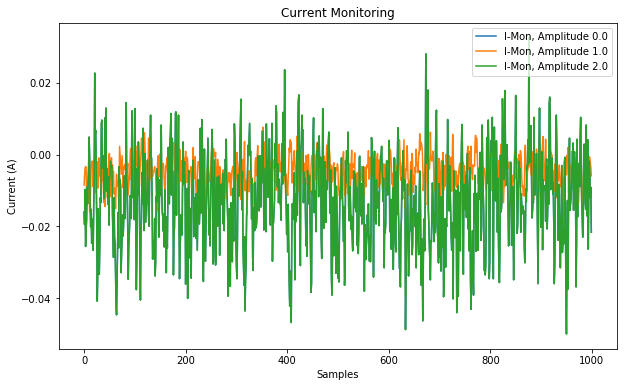

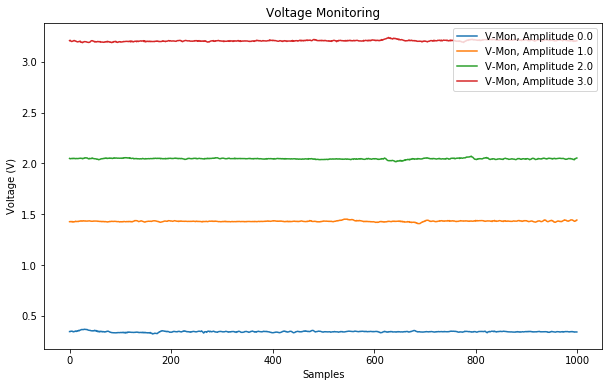

In [18]:
# -*- coding: utf-8 -*-    JJA17 at 100K
"""
Created on Wed 10 Jan 2024 14:41:52 
@author: AJ
"""
#%matplotlib notebook 
import numpy as np
import nidaqmx
import time
import pyvisa as visa
import matplotlib.pyplot as plt
import pandas as pd

# FIRST PART: MODULATE AMPLITUDE
rm = visa.ResourceManager()
gen = rm.open_resource(r'USB0::0x1AB1::0x0642::DG1ZA241701602::INSTR')  # Rigol DG1022 noise generator
gen.write('*RST')  # Reset the generator
gen.write('OUTPut1:STATe On')  # Turning on the output of Channel 1
#gen.write('OUTPut2:STATe On')  # Turning on the output of Channel 2

df = pd.DataFrame()      # DATA FRAME FOR CurrentMonitor as current_data
df1 = pd.DataFrame()     # DATA FRAME FOR VoltageMonitor as voltage_data
voltage_mean = []

# SECOND PART: READ the VOLTAGE
with nidaqmx.Task() as send_current, nidaqmx.Task() as send_voltage:
    send_current.ai_channels.add_ai_voltage_chan("Dev4/ai7")  # Set the channel to read I-Mon from NationalInstrument
    send_current.timing.cfg_samp_clk_timing(rate=100000)  # Set the sampling rate

    send_voltage.ai_channels.add_ai_voltage_chan("Dev4/ai5")  # Add another channel to read the V-Mon
    send_voltage.timing.cfg_samp_clk_timing(rate=100000)  # Set the sampling rate
    
    # Read the voltage and apply noise
    amplitude_range = np.linspace(0, 3, 4)
    for i in amplitude_range:
        amplitude = i  # Change the amplitude of the noise signal
        gen.write(f'SOUR1:APPL:NOIS {amplitude}')  # Apply noise with the specified amplitude
        time.sleep(1)  # Wait for the noise to settle

        current_data = send_current.read(number_of_samples_per_channel=20000)
        voltage_data = send_voltage.read(number_of_samples_per_channel=20000)

        # Assuming you want to separate the data into different columns in the DataFrame
        df[f'{amplitude}V'] = current_data
        df1[f'{amplitude}V'] = voltage_data

        current_std = np.std(current_data)
        voltage_std = np.std(voltage_data)

        print(f'Amplitude: {amplitude}')
        print(f'Current Mean (I-Mon): {np.mean(current_data):.3f} A')
        print(f'Voltage Mean (V-Mon): {np.mean(voltage_data):.3f} V')
        print(f'Current Standard Deviation (I-Mon): {current_std:.3f} A')
        print(f'Voltage Standard Deviation (V-Mon): {voltage_std:.3f} V')

# The rest of your code for closing the generator and plotting the data
gen.write('OUTPut1:STATe Off')
#gen.write('OUTPut2:STATe Off')  # Turn off the generator
gen.close()

# Plot data from both channels in separate figures
plt.figure(figsize=(10, 6))  # Figure for Current plots
for i in amplitude_range:
    current_column_index = int((2*i-1))

    if current_column_index < df.shape[1]:
        plt.plot(df.iloc[:, current_column_index], label=f'I-Mon, Amplitude {i}')

plt.legend()
plt.xlabel('Samples')
plt.ylabel('Current (A)')
plt.title('Current Monitoring')
plt.show()

plt.figure(figsize=(10, 6))  # Figure for Voltage plots
for i in amplitude_range:
    voltage_column_index = int((i))

    if voltage_column_index < df1.shape[1]:
        plt.plot(df1.iloc[:, voltage_column_index], label=f'V-Mon, Amplitude {i}')

plt.legend()
plt.xlabel('Samples')
plt.ylabel('Voltage (V)')
plt.title('Voltage Monitoring')
plt.show()

Amplitude: 0.0
Current Mean (I-Mon): 0.001 A
Voltage Mean (V-Mon): 1.557 V
Current Standard Deviation (I-Mon): 0.001 A
Voltage Standard Deviation (V-Mon): 0.000 V
Amplitude: 0.5555555555555556
Current Mean (I-Mon): -0.002 A
Voltage Mean (V-Mon): 1.557 V
Current Standard Deviation (I-Mon): 0.002 A
Voltage Standard Deviation (V-Mon): 0.000 V
Amplitude: 1.1111111111111112
Current Mean (I-Mon): -0.005 A
Voltage Mean (V-Mon): 1.557 V
Current Standard Deviation (I-Mon): 0.004 A
Voltage Standard Deviation (V-Mon): 0.000 V
Amplitude: 1.6666666666666667
Current Mean (I-Mon): -0.008 A
Voltage Mean (V-Mon): 1.556 V
Current Standard Deviation (I-Mon): 0.007 A
Voltage Standard Deviation (V-Mon): 0.001 V
Amplitude: 2.2222222222222223
Current Mean (I-Mon): -0.012 A
Voltage Mean (V-Mon): 1.554 V
Current Standard Deviation (I-Mon): 0.009 A
Voltage Standard Deviation (V-Mon): 0.001 V
Amplitude: 2.7777777777777777
Current Mean (I-Mon): -0.014 A
Voltage Mean (V-Mon): 1.552 V
Current Standard Deviation (I-

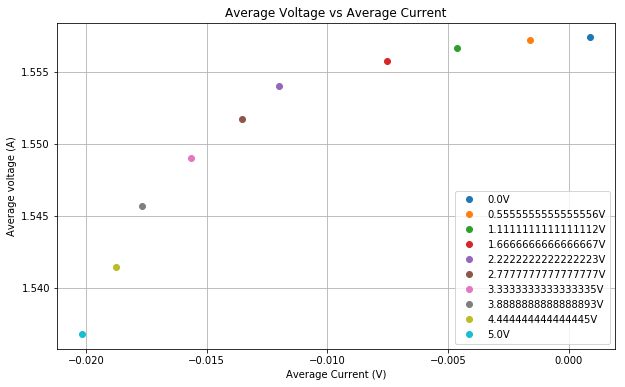

In [11]:
# -*- coding: utf-8 -*-
"""
Created on Mon Apr 17 14:41:52 2023
@author: AJ
"""
#%matplotlib notebook 
import numpy as np
import nidaqmx
import time
import pyvisa as visa
import matplotlib.pyplot as plt
import pandas as pd

# FIRST PART: MODULATE AMPLITUDE
rm = visa.ResourceManager()
gen = rm.open_resource(r'USB0::0x1AB1::0x0642::DG1ZA241701602::INSTR')  # Rigol DG1022 noise generator
gen.write('*RST')  # Reset the generator
gen.write('OUTPut1:STATe On')  # Turning on the output of Channel 1

df = pd.DataFrame()      # DATA FRAME FOR CurrentMonitor as current_data
df1 = pd.DataFrame()     # DATA FRAME FOR VoltageMonitor as voltage_data

# SECOND PART: READ the VOLTAGE
with nidaqmx.Task() as send_current, nidaqmx.Task() as send_voltage:
    send_current.ai_channels.add_ai_voltage_chan("Dev4/ai7")  # Set the channel to read I-Mon from
    send_current.timing.cfg_samp_clk_timing(rate=100000)  # Set the sampling rate

    send_voltage.ai_channels.add_ai_voltage_chan("Dev4/ai3")  # Add another channel to read the V-Mon
    send_voltage.timing.cfg_samp_clk_timing(rate=100000)  # Set the sampling rate
    
    # Read the voltage and apply noise
    amplitude_range = np.linspace(0, 5, 10)
    plt.figure(figsize=(10, 6))  # You can adjust the size as needed
    for i in amplitude_range:
        amplitude = i  # Change the amplitude of the noise signal
        try:
            gen.write(f'SOUR1:APPL:NOIS {amplitude}')  # Apply noise with the specified amplitude
        except Exception as e:
            print(f"Error writing to instrument: {e}")
            continue

        time.sleep(1)  # Wait for the noise to settle

        current_data = send_current.read(number_of_samples_per_channel=20000)
        voltage_data = send_voltage.read(number_of_samples_per_channel=20000)

        # Assuming you want to separate the data into different columns in the DataFrame
        df[f'{amplitude}V'] = current_data
        df1[f'{amplitude}V'] = voltage_data

        current_std = np.std(current_data)
        voltage_std = np.std(voltage_data)

        print(f'Amplitude: {amplitude}')
        print(f'Current Mean (I-Mon): {np.mean(current_data):.3f} A')
        print(f'Voltage Mean (V-Mon): {np.mean(voltage_data):.3f} V')
        print(f'Current Standard Deviation (I-Mon): {current_std:.3f} A')
        print(f'Voltage Standard Deviation (V-Mon): {voltage_std:.3f} V')

        # Plot average voltage against average current
        plt.plot( np.mean(current_data), np.mean(voltage_data), 'o', label=f'{amplitude}V')

# Customize the plot
plt.title('Average Voltage vs Average Current')
plt.xlabel('Average Current (V)')
plt.ylabel('Average voltage (A)')
plt.legend()
plt.grid(True)
plt.show()

# The rest of your code for closing the generator and plotting the data
try:
    gen.write('OUTPut1:STATe Off')
    gen.close()
except Exception as e:
    print(f"Error closing the instrument: {e}")


Amplitude: 0.0
Current Mean (I-Mon): 0.001 A
Voltage Mean (V-Mon): -0.001 V
Current Standard Deviation (I-Mon): 0.001 A
Voltage Standard Deviation (V-Mon): 0.006 V
Amplitude: 1.0
Current Mean (I-Mon): -0.004 A
Voltage Mean (V-Mon): -0.001 V
Current Standard Deviation (I-Mon): 0.004 A
Voltage Standard Deviation (V-Mon): 0.007 V
Amplitude: 2.0
Current Mean (I-Mon): -0.008 A
Voltage Mean (V-Mon): -0.001 V
Current Standard Deviation (I-Mon): 0.008 A
Voltage Standard Deviation (V-Mon): 0.006 V
Amplitude: 3.0
Current Mean (I-Mon): -0.015 A
Voltage Mean (V-Mon): -0.000 V
Current Standard Deviation (I-Mon): 0.013 A
Voltage Standard Deviation (V-Mon): 0.007 V


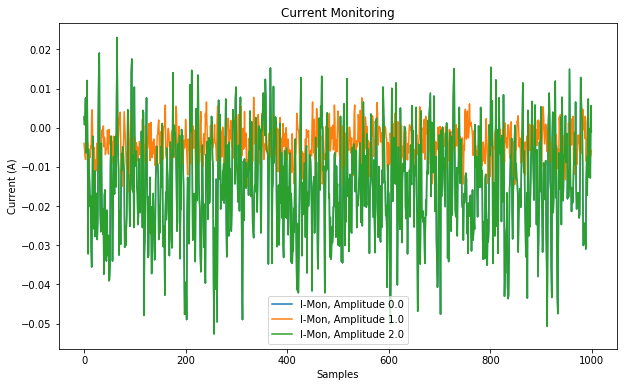

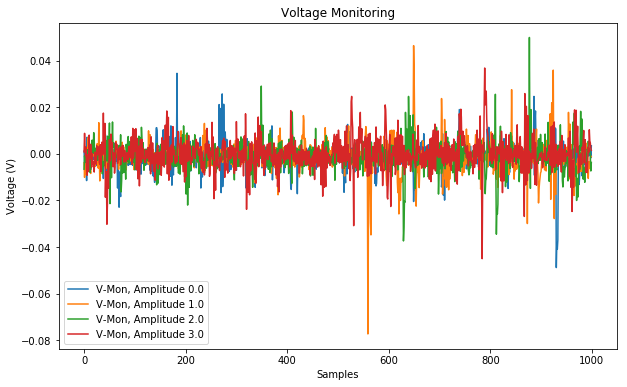

In [13]:
# -*- coding: utf-8 -*-      JJA13
"""
Created on Mon Apr 17 14:41:52 2023
@author: AJ
"""
#%matplotlib notebook 
import numpy as np
import nidaqmx
import time
import pyvisa as visa
import matplotlib.pyplot as plt
import pandas as pd

# FIRST PART: MODULATE AMPLITUDE
rm = visa.ResourceManager()
gen = rm.open_resource(r'USB0::0x1AB1::0x0642::DG1ZA241701602::INSTR')  # Rigol DG1022 noise generator
gen.write('*RST')  # Reset the generator
gen.write('OUTPut1:STATe On')  # Turning on the output of Channel 1
#gen.write('OUTPut2:STATe On')  # Turning on the output of Channel 2

df = pd.DataFrame()      # DATA FRAME FOR CurrentMonitor as current_data
df1 = pd.DataFrame()     # DATA FRAME FOR VoltageMonitor as voltage_data
voltage_mean = []

# SECOND PART: READ the VOLTAGE
with nidaqmx.Task() as send_current, nidaqmx.Task() as send_voltage:
    send_current.ai_channels.add_ai_voltage_chan("Dev4/ai7")  # Set the channel to read I-Mon from NationalInstrument
    send_current.timing.cfg_samp_clk_timing(rate=100000)  # Set the sampling rate

    send_voltage.ai_channels.add_ai_voltage_chan("Dev4/ai5")  # Add another channel to read the V-Mon
    send_voltage.timing.cfg_samp_clk_timing(rate=100000)  # Set the sampling rate
    
    # Read the voltage and apply noise
    amplitude_range = np.linspace(0, 3, 4)
    for i in amplitude_range:
        amplitude = i  # Change the amplitude of the noise signal
        gen.write(f'SOUR1:APPL:NOIS {amplitude}')  # Apply noise with the specified amplitude
        time.sleep(1)  # Wait for the noise to settle

        current_data = send_current.read(number_of_samples_per_channel=20000)
        voltage_data = send_voltage.read(number_of_samples_per_channel=20000)

        # Assuming you want to separate the data into different columns in the DataFrame
        df[f'{amplitude}V'] = current_data
        df1[f'{amplitude}V'] = voltage_data

        current_std = np.std(current_data)
        voltage_std = np.std(voltage_data)

        print(f'Amplitude: {amplitude}')
        print(f'Current Mean (I-Mon): {np.mean(current_data):.3f} A')
        print(f'Voltage Mean (V-Mon): {np.mean(voltage_data):.3f} V')
        print(f'Current Standard Deviation (I-Mon): {current_std:.3f} A')
        print(f'Voltage Standard Deviation (V-Mon): {voltage_std:.3f} V')

# The rest of your code for closing the generator and plotting the data
gen.write('OUTPut1:STATe Off')
#gen.write('OUTPut2:STATe Off')  # Turn off the generator
gen.close()

# Plot data from both channels in separate figures
plt.figure(figsize=(10, 6))  # Figure for Current plots
for i in amplitude_range:
    current_column_index = int((2*i-1))

    if current_column_index < df.shape[1]:
        plt.plot(df.iloc[:, current_column_index], label=f'I-Mon, Amplitude {i}')

plt.legend()
plt.xlabel('Samples')
plt.ylabel('Current (A)')
plt.title('Current Monitoring')
plt.show()

plt.figure(figsize=(10, 6))  # Figure for Voltage plots
for i in amplitude_range:
    voltage_column_index = int((i))

    if voltage_column_index < df1.shape[1]:
        plt.plot(df1.iloc[:, voltage_column_index], label=f'V-Mon, Amplitude {i}')

plt.legend()
plt.xlabel('Samples')
plt.ylabel('Voltage (V)')
plt.title('Voltage Monitoring')
plt.show()